In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
print("covid sucks")

covid sucks


In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns = cancer.feature_names)
y = pd.Series(cancer.target)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2)

In [12]:
#Usando el dataset de diagnosticos de tipo de cancer, calculemos la performance para los K entre 1 y 15, y aplicando las distancias euclidea y de Manhattan.

#Para medir la performance, usar cross validation de 10 folds.

#Mostrar el K óptimo, su performance, y graficar la performance para todos los K.

In [24]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.9370629370629371

In [26]:
X_train_train, X_validation, y_train_train, y_validation = train_test_split(X_train, y_train, random_state=2)

K_range = list(range(1,26))
scores = []
for k in K_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_train, y_train_train)
    y_pred = knn.predict(X_validation)
    scores.append(accuracy_score(y_validation, y_pred))

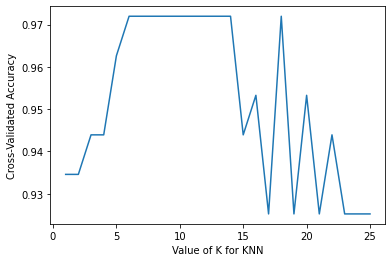

In [29]:
#make a plot with scores
plt.plot(K_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [30]:
kf = KFold(n_splits=10, shuffle=True, random_state=2)

scoresDF = []

for i in range(1,26):
    model = KNeighborsClassifier(n_neighbors=i)

    scores = cross_val_score(model, X_train, y_train, cv=kf)

    dict_row_score = {'media': np.mean(scores), 'neigbors':i}
    scoresDF.append(dict_row_score)
    

In [31]:
df_scores = pd.DataFrame(scoresDF)

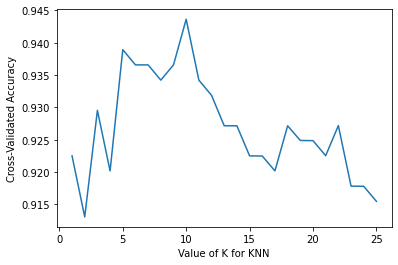

In [33]:
#make a plot with median for each neigbord
plt.plot(df_scores['neigbors'], df_scores['media'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
